<a href="https://colab.research.google.com/github/srikanthravipati27/ml/blob/main/DataPreprocessing_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('/content/drive/MyDrive/DataPreprocessing2.csv')
data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [ ]:

print(int(data.duplicated().sum()))

0


In [ ]:
data.isnull().sum()

,0
passenger_id,0
pclass,0
name,0
sex,0
age,174
sibsp,0
parch,0
ticket,0
fare,1
cabin,659


In [ ]:
data.isnull().mean()*100

,0
passenger_id,0.000000
pclass,0.000000
name,0.000000
sex,0.000000
age,20.470588
sibsp,0.000000
parch,0.000000
ticket,0.000000
fare,0.117647
cabin,77.529412


In [ ]:
#removing null values
data['fare']=data['fare'].fillna(data['fare'].median())
data['age']=data['age'].fillna(data['age'].median())
data.drop('home.dest',axis=1,inplace=True)
data.drop('body',axis=1,inplace=True)
data.drop('boat',axis=1,inplace=True)
data.drop('cabin',axis=1,inplace=True)
data.drop('name',axis=1,inplace=True)
data.drop('ticket',axis=1,inplace=True)
data['embarked']=data['embarked'].fillna(data['embarked'].mode()[0])
data.isnull().sum()


,0
passenger_id,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
survived,0


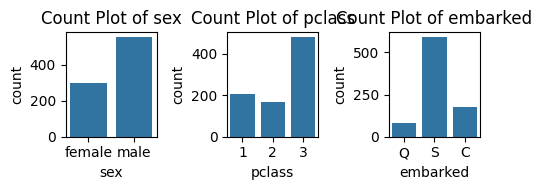

In [ ]:
plt.figure(figsize=(5, 2))
n=['sex','pclass','embarked']
for i, col in enumerate(n):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=data[col])
    plt.title(f'Count Plot of {col}')
    plt.tight_layout()



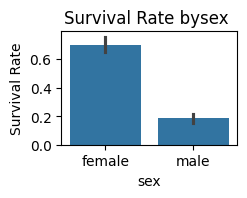

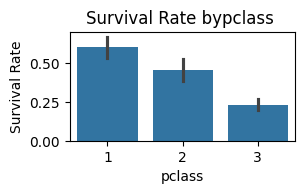

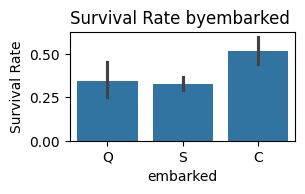

In [ ]:
plt.figure(figsize=(5, 5))

for i, col in enumerate(n):
  plt.subplot(3, 2, i+1)
  sns.barplot(x=n[i], y='survived', data=data)
  plt.title(f'Survival Rate by{n[i]} ')
  plt.ylabel('Survival Rate')
  plt.show()

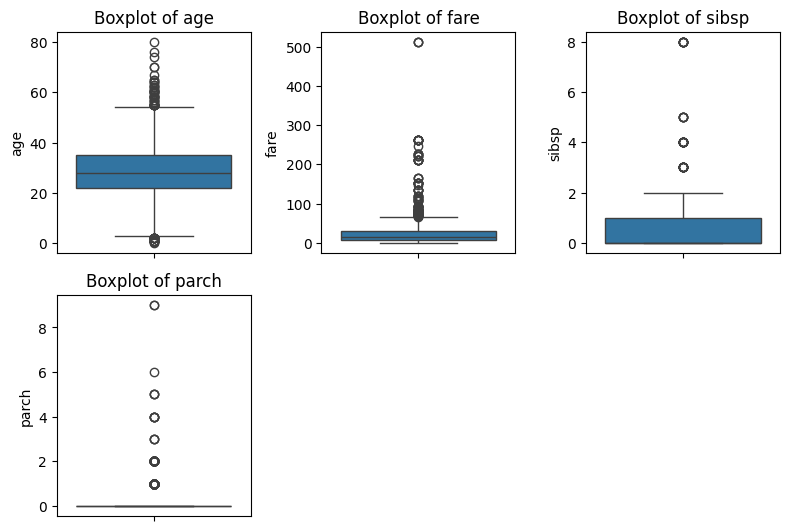

In [ ]:

#handling of outliers
num=["age", "fare", "sibsp", "parch"]
plt.figure(figsize=(8,8))
for i, col in enumerate(num):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

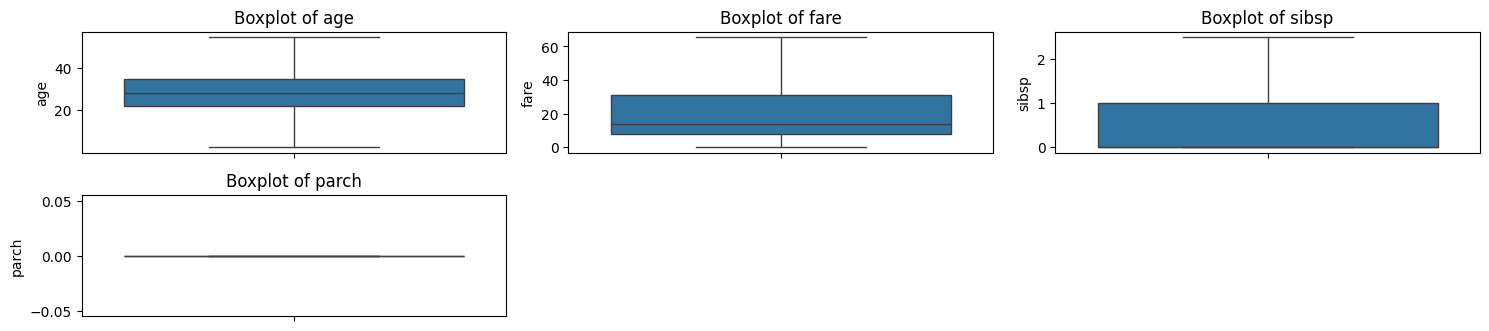

In [ ]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
for i in num:
  cap_outliers(data,i)
plt.figure(figsize=(15, 5))
for i, col in enumerate(num):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

In [ ]:
#Feature engineering
data['family_size'] = data['sibsp'] + data['parch'] + 1
data['is_alone'] = (data['family_size'] == 1).astype(int)

In [ ]:
#scaling and encoding
cat=['pclass','sex','embarked']
num.append('family_size')
num.append('is_alone')
from sklearn.preprocessing import StandardScaler,OneHotEncoder
ss=StandardScaler()
data[num]=ss.fit_transform(data[num])
ohe = OneHotEncoder(sparse_output=False)
data1 = pd.DataFrame(ohe.fit_transform(data[cat]), columns=ohe.get_feature_names_out(cat), index=data.index)
data = pd.concat([data, data1], axis=1)
data.drop(cat, axis=1, inplace=True)


In [ ]:
#feature reduction
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0)
selector.fit(data)
new = data[data.columns[selector.get_support(indices=True)]]
new

,passenger_id,age,sibsp,fare,survived,family_size,is_alone,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1216,-0.073295,-0.615294,-0.787563,1,-0.615294,0.695285,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,699,0.758770,-0.615294,-0.743279,0,-0.615294,0.695285,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1267,0.093118,0.835469,-0.005159,0,0.835469,-1.438260,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,449,2.090074,0.835469,-0.059967,1,0.835469,-1.438260,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,576,0.925183,-0.615294,-0.536557,0,-0.615294,0.695285,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,2.105675,-0.615294,1.226827,0,-0.615294,0.695285,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
846,174,2.105675,-0.615294,0.259349,0,-0.615294,0.695285,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
847,467,-0.406121,0.835469,0.083010,1,0.835469,-1.438260,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
848,1112,-2.153457,0.835469,-0.499622,0,0.835469,-1.438260,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
